In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import DBSCAN
#importing and reading the dataset and data exploration
df= pd.read_csv('ObesityDataSet.csv')

In [4]:
def null_check(df):
    null_columns = []
    for column in df.columns:
        print("Column Name:", column)
        print("Column DataType:", df[column].dtype)
        if df[column].dtype != 'float64':
            print("Column unique values:", df[column].unique())
        print("Column has null:", df[column].isnull().any())
        if df[column].isnull().any() == True:
            print("Column Null Count:", df[column].isnull().sum())
            null_columns.append(column)
        print("\n")
    return null_columns

null_cols = null_check(df)

Column Name: Gender
Column DataType: object
Column unique values: ['Female' 'Male']
Column has null: False


Column Name: Age
Column DataType: float64
Column has null: False


Column Name: Height
Column DataType: float64
Column has null: False


Column Name: Weight
Column DataType: float64
Column has null: False


Column Name: family_history_with_overweight
Column DataType: object
Column unique values: ['yes' 'no']
Column has null: False


Column Name: FAVC
Column DataType: object
Column unique values: ['no' 'yes']
Column has null: False


Column Name: FCVC
Column DataType: float64
Column has null: False


Column Name: NCP
Column DataType: float64
Column has null: False


Column Name: CAEC
Column DataType: object
Column unique values: ['Sometimes' 'Frequently' 'Always' 'no']
Column has null: False


Column Name: SMOKE
Column DataType: object
Column unique values: ['no' 'yes']
Column has null: False


Column Name: CH2O
Column DataType: float64
Column has null: False


Column Name: SCC
C

In [3]:
df.drop(['Gender', 'NObeyesdad'], axis=1, inplace=True)

In [7]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
# displaying data types, null values, and possible outliers in each column
def dataframe_summary():
    
    # lists
    var_list = df.columns.to_list()
    dtype_list = []
    null_list = []
    
    # looping through columns
    for col in df.columns:
        dtype_list.append(df[col].dtype)
        null_list.append(df[col].isnull().sum())
    
    # outliers IQR
    Q1 = df.quantile(.25)
    Q3 = df.quantile(.75)
    IQR = Q3 - Q1
    k = 1.5
    outlier_list = ((df < (Q1 - k * IQR)) | (df > (Q3 + k * IQR))).sum().to_list()
    
    # stacking lists into dictionary
    dict = {'Variable': var_list, 'Data type': dtype_list, 'Null values': null_list, 'Outliers': outlier_list}
    
    return pd.DataFrame(dict).style.hide_index()
    
dataframe_summary()

C:\Users\lenovo1\AppData\Local\Temp\ipykernel_2624\3884873115.py:17: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(.25)
C:\Users\lenovo1\AppData\Local\Temp\ipykernel_2624\3884873115.py:18: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(.75)
C:\Users\lenovo1\AppData\Local\Temp\ipykernel_2624\3884873115.py:21: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier_list = ((df < (Q1 - k * IQR)) | (df > (Q3 + k * IQR))).sum().to_list()
C:\Us

Variable,Data type,Null values,Outliers
Age,float64,0,168
Height,float64,0,0
Weight,float64,0,0
family_history_with_overweight,object,0,0
FAVC,object,0,0
FCVC,float64,0,0
NCP,float64,0,0
CAEC,object,0,1
SMOKE,object,0,0
CH2O,float64,0,579


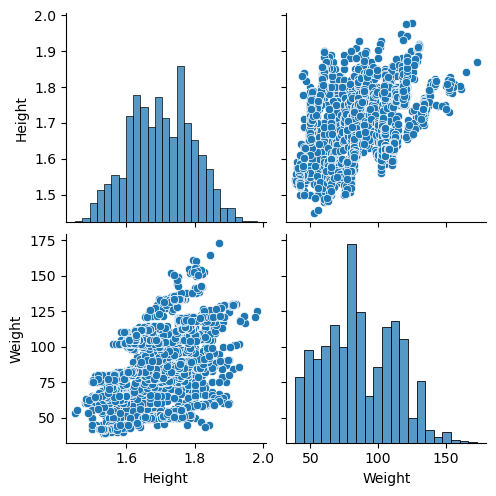

In [9]:
#initial cluster visualization and comparison
X = df.iloc[:,1:5]
sns.pairplot(X)

In [4]:
# Converting the categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE','SCC','CALC','MTRANS'])

In [5]:
# Normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

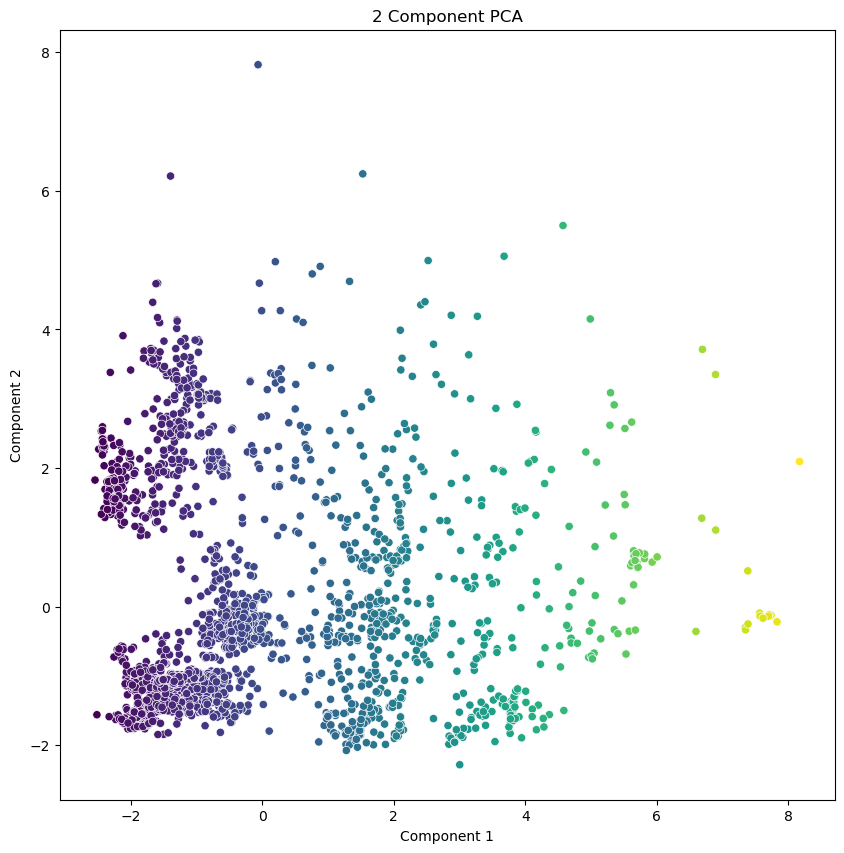

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2111 samples in 0.002s...
[t-SNE] Computed neighbors for 2111 samples in 4.971s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2111
[t-SNE] Computed conditional probabilities for sample 2000 / 2111
[t-SNE] Computed conditional probabilities for sample 2111 / 2111
[t-SNE] Mean sigma: 0.809359
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.470753
[t-SNE] KL divergence after 300 iterations: 1.144306


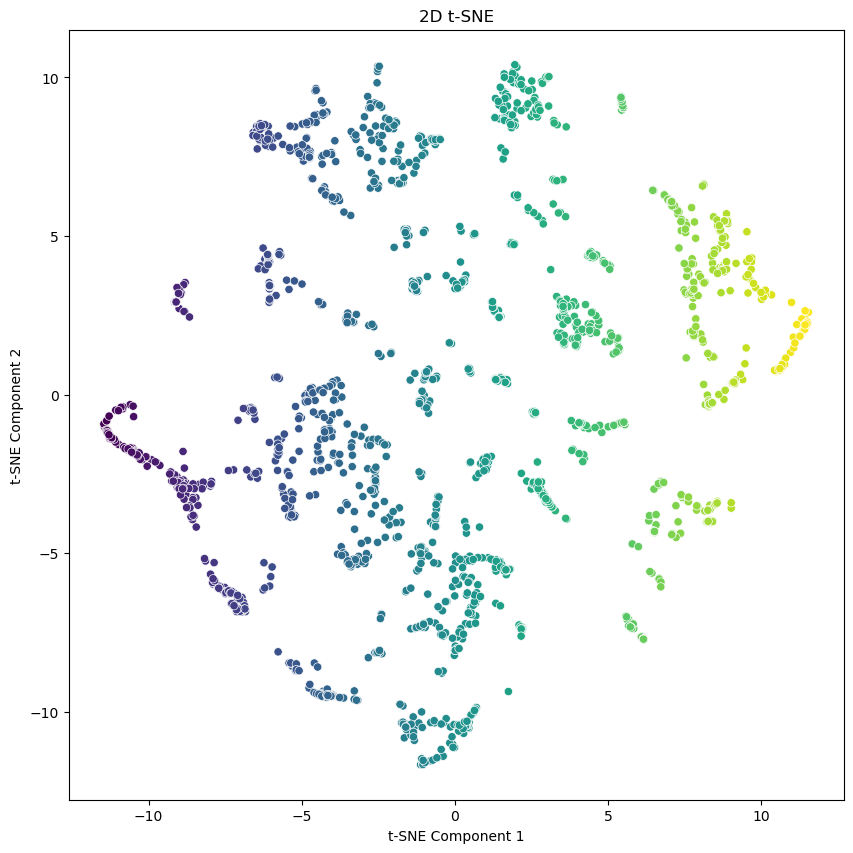

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2111 samples in 0.002s...
[t-SNE] Computed neighbors for 2111 samples in 0.406s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2111
[t-SNE] Computed conditional probabilities for sample 2000 / 2111
[t-SNE] Computed conditional probabilities for sample 2111 / 2111
[t-SNE] Mean sigma: 0.809359
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.681942
[t-SNE] KL divergence after 300 iterations: 0.969220


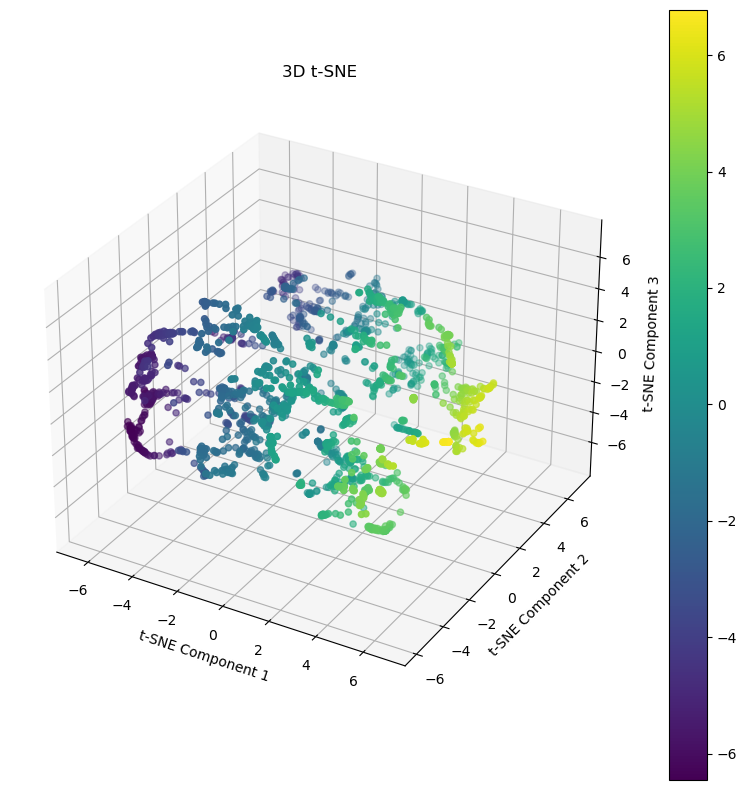

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

def scale_data(df):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    return df_scaled

def pca_2d_visualization(df_scaled):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(df_scaled)
    PCA_dataset = pd.DataFrame(data=principalComponents, columns=['component1', 'component2'])
    plt.figure(figsize=(10, 10))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('2 Component PCA')
    sns.scatterplot(x='component1', y='component2', data=PCA_dataset, palette='viridis', hue='component1', legend=False)
    plt.show()

def tsne_2d_visualization(df_scaled, perplexity=40, n_iter=300):
    tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=n_iter)
    tsne_results = tsne.fit_transform(df_scaled)
    TSNE_dataset = pd.DataFrame(data=tsne_results, columns=['tsne_component1', 'tsne_component2'])
    plt.figure(figsize=(10, 10))
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title('2D t-SNE')
    sns.scatterplot(x='tsne_component1', y='tsne_component2', data=TSNE_dataset, palette='viridis', hue='tsne_component1', legend=False)
    plt.show()

def tsne_3d_visualization(df_scaled, perplexity=40, n_iter=300):
    tsne = TSNE(n_components=3, verbose=1, perplexity=perplexity, n_iter=n_iter)
    tsne_results = tsne.fit_transform(df_scaled)
    TSNE_dataset = pd.DataFrame(data=tsne_results, columns=['tsne_component1', 'tsne_component2', 'tsne_component3'])
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    plt.title('3D t-SNE')
    scatter = ax.scatter(xs=TSNE_dataset['tsne_component1'], 
                         ys=TSNE_dataset['tsne_component2'], 
                         zs=TSNE_dataset['tsne_component3'], 
                         c=TSNE_dataset['tsne_component1'], 
                         cmap='viridis')
    ax.set_xlabel('t-SNE Component 1')
    ax.set_ylabel('t-SNE Component 2')
    ax.set_zlabel('t-SNE Component 3')
    plt.colorbar(scatter)
    plt.show()
df_scaled = scale_data(df)
pca_2d_visualization(df_scaled)
tsne_2d_visualization(df_scaled)
tsne_3d_visualization(df_scaled)


[[0.         0.05484832]
 [0.         0.04503675]
 [0.         0.07921256]
 ...
 [0.         0.03190027]
 [0.         0.00353229]
 [0.         0.01974098]] [[   0  549]
 [   1  380]
 [   2  162]
 ...
 [2108 2107]
 [2109 1822]
 [2110 2012]]


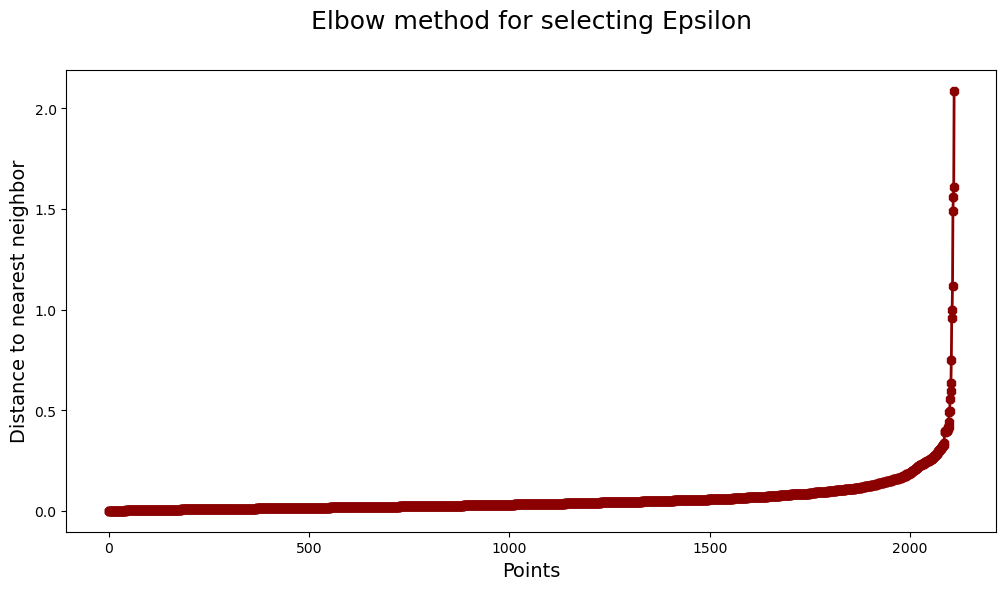

In [13]:
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit(df_scaled).transform(df_scaled)
from sklearn.neighbors import NearestNeighbors


neigh = NearestNeighbors(n_neighbors = 2)


nbrs = neigh.fit(df_pca)


distances, indices = nbrs.kneighbors(df_pca)

print(distances, indices)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Fit the NearestNeighbors model
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_pca)

# Compute the nearest neighbors and their distances
distances, indices = nbrs.kneighbors(df_pca)

# Sort the distances for plotting
distances = np.sort(distances, axis=0)
distances = distances[:, 1]  # Get the distance of the 2nd closest neighbor

# Plotting the elbow method
plt.figure(figsize=(12, 6))
plt.rcParams['figure.figsize'] = (5, 3)
plt.plot(distances, color='darkred', linewidth=2, marker='8')
plt.title('Elbow method for selecting Epsilon', fontsize=18, pad=30)
plt.xlabel('Points', fontsize=14)
plt.ylabel('Distance to nearest neighbor', fontsize=14)
plt.show()


# DBSCAN 1

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# DBSCAN model with specified parameters
dbscan_opt_1 = DBSCAN(eps=0.5, min_samples=5)
dbs_model_1 = dbscan_opt_1.fit(df_pca)

# Extracting labels
dbs_labels_1 = dbs_model_1.labels_

# Calculating the number of clusters
n_clusters_1 = len(set(dbs_labels_1)) - (1 if -1 in dbs_labels_1 else 0)

# Counting noise points
n_noise_1 = list(dbs_labels_1).count(-1)

# Calculating silhouette score
silh_score_dbs_1 = silhouette_score(df_pca, dbs_labels_1)

# Print the metrics
print(f"Estimated number of clusters: {n_clusters_1}")
print(f"Estimated number of noise points: {n_noise_1}")
print(f"Silhouette Coefficient: {silh_score_dbs_1}")


Estimated number of clusters: 5
Estimated number of noise points: 31
Silhouette Coefficient: 0.31640792906778004


In [26]:
# DBSCAN model with different parameters for comparison
dbscan_opt_2 = DBSCAN(eps=0.6, min_samples=10)
dbs_model_2 = dbscan_opt_2.fit(df_pca)

# Extracting the labels after fitting the model
dbs_labels_2 = dbs_model_2.labels_

# Calculating the number of clusters
n_clusters_2 = len(set(dbs_labels_2)) - (1 if -1 in dbs_labels_2 else 0)

# Counting noise points
n_noise_2 = list(dbs_labels_2).count(-1)

# Calculating silhouette score
silh_score_dbs_2 = silhouette_score(df_pca, dbs_labels_2) if n_clusters_2 > 1 else -1

# Print the metrics for the second model
print(f"Estimated number of clusters for DBSCAN 2: {n_clusters_2}")
print(f"Estimated number of noise points for DBSCAN 2: {n_noise_2}")
print(f"Silhouette Coefficient for DBSCAN 2: {silh_score_dbs_2}")


Estimated number of clusters for DBSCAN 2: 2
Estimated number of noise points for DBSCAN 2: 48
Silhouette Coefficient for DBSCAN 2: 0.45030139988555395


# HYPERPARAMETER TUNING

In [23]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Grid search parameters
eps_values = np.arange(0.1, 2.0, 0.1)
min_samples_values = range(2, 20)

best_score = -1
best_params = {'eps': None, 'min_samples': None}
silhouette_scores = []
cluster_counts = []

# PCA transformation (assuming df_scaled is already defined)
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit(df_scaled).transform(df_scaled)

# Training loop
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(df_pca)
        
        # Calculate the number of clusters
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        
        # Calculate Silhouette Score (only if there are more than 1 cluster)
        if n_clusters > 1:
            sil_score = silhouette_score(df_pca, clusters)
            silhouette_scores.append((eps, min_samples, sil_score))
            cluster_counts.append((eps, min_samples, n_clusters))
            if sil_score > best_score:
                best_score = sil_score
                best_params['eps'] = eps
                best_params['min_samples'] = min_samples

print(f"Best Silhouette Score: {best_score}")
print(f"Best Parameters: eps={best_params['eps']}, min_samples={best_params['min_samples']}")


Best Silhouette Score: 0.5244586119854537
Best Parameters: eps=0.7000000000000001, min_samples=3


# DBSCAN BEST

In [27]:
# DBSCAN model with the best-found parameters
dbscan_best = DBSCAN(eps=0.7, min_samples=3)
dbs_model_best = dbscan_best.fit(df_pca)

# Extracting the labels after fitting the model
dbs_labels_best = dbs_model_best.labels_

# Calculating the number of clusters
n_clusters_best = len(set(dbs_labels_best)) - (1 if -1 in dbs_labels_best else 0)

# Counting noise points
n_noise_best = list(dbs_labels_best).count(-1)

# Calculating silhouette score
silh_score_dbs_best = silhouette_score(df_pca, dbs_labels_best) if n_clusters_best > 1 else -1

# Print the metrics for the best model
print(f"Estimated number of clusters for DBSCAN Best: {n_clusters_best}")
print(f"Estimated number of noise points for DBSCAN Best: {n_noise_best}")
print(f"Silhouette Coefficient for DBSCAN Best: {silh_score_dbs_best}")


Estimated number of clusters for DBSCAN Best: 2
Estimated number of noise points for DBSCAN Best: 12
Silhouette Coefficient for DBSCAN Best: 0.5244586119854537


Number of features before PCA: 29
Number of features after PCA: 17
Explained variance ratio: 0.9074905991049725


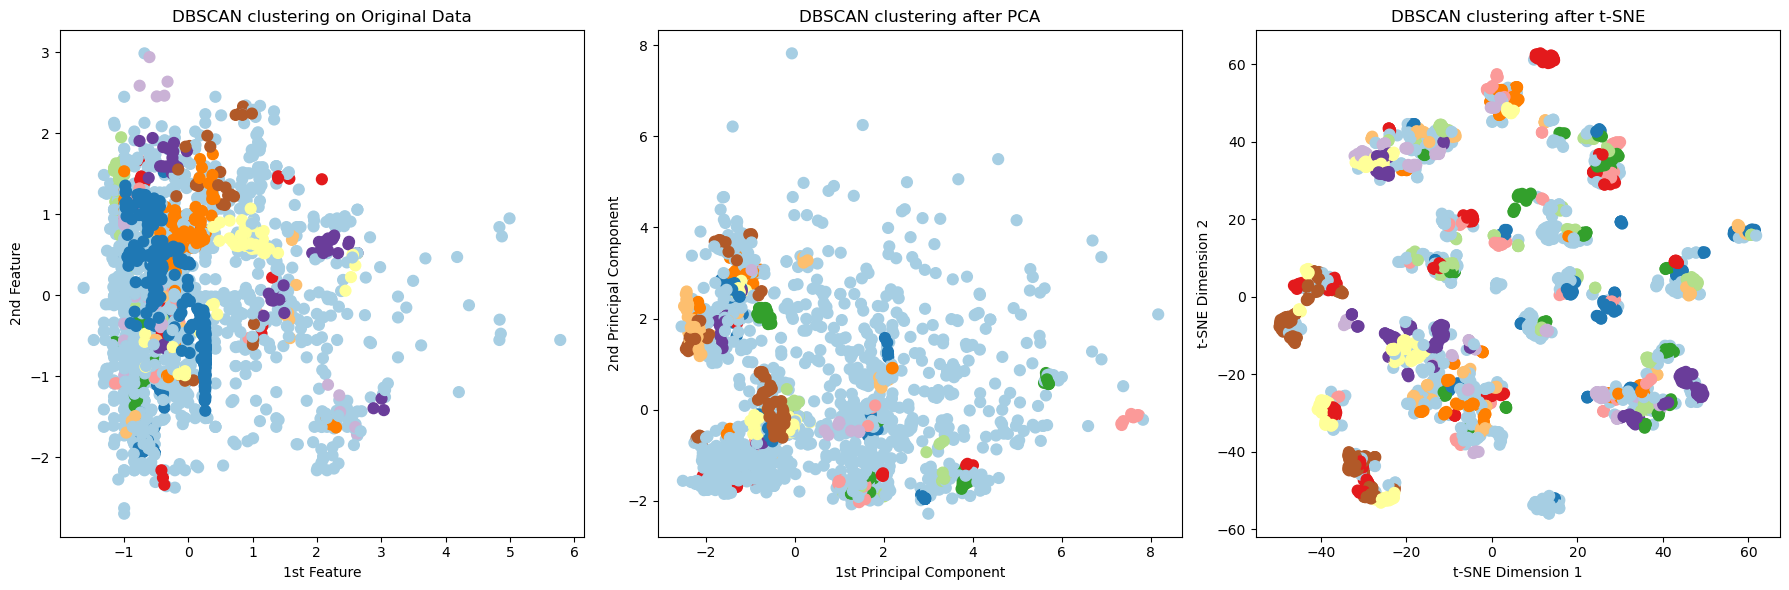

In [28]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def dbscan_clustering_comparison(df, eps=0.7, min_samples=3, pca_variance_threshold=0.90, random_state=42):
    # Scale the data
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)

    # PCA transformation
    pca = PCA(n_components=pca_variance_threshold)
    df_pca = pca.fit_transform(df_scaled)

    # t-SNE transformation
    tsne = TSNE(n_components=2, random_state=random_state)
    df_tsne = tsne.fit_transform(df_scaled)

    print("Number of features before PCA:", df.shape[1])
    print("Number of features after PCA:", pca.n_components_)
    print("Explained variance ratio:", sum(pca.explained_variance_ratio_))

    # DBSCAN clustering on scaled data, PCA data, and t-SNE data with the best parameters
    dbscan_fit = DBSCAN(eps=eps, min_samples=min_samples).fit(df_scaled)
    dbscan_pca = DBSCAN(eps=eps, min_samples=min_samples).fit(df_pca)
    dbscan_tsne = DBSCAN(eps=eps, min_samples=min_samples).fit(df_tsne)

    # Plot original vs transformed data with clustering labels
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

    # Original data clustering
    ax1.scatter(df_scaled[:, 0], df_scaled[:, 1], s=60, c=dbscan_fit.labels_, cmap="Paired")
    ax1.set_title('DBSCAN clustering on Original Data')
    ax1.set_xlabel('1st Feature')
    ax1.set_ylabel('2nd Feature')

    # PCA transformed data clustering
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], s=60, c=dbscan_pca.labels_, cmap="Paired")
    ax2.set_title('DBSCAN clustering after PCA')
    ax2.set_xlabel('1st Principal Component')
    ax2.set_ylabel('2nd Principal Component')

    # t-SNE transformed data clustering
    ax3.scatter(df_tsne[:, 0], df_tsne[:, 1], s=60, c=dbscan_tsne.labels_, cmap="Paired")
    ax3.set_title('DBSCAN clustering after t-SNE')
    ax3.set_xlabel('t-SNE Dimension 1')
    ax3.set_ylabel('t-SNE Dimension 2')

    plt.tight_layout()
    plt.show()

# Example usage
dbscan_clustering_comparison(df)


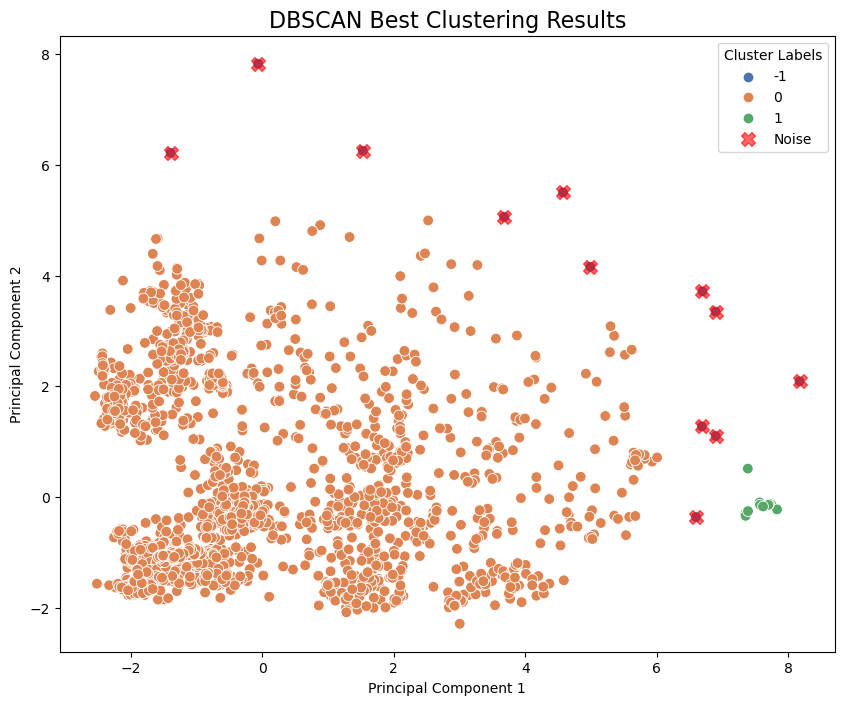

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_pca_best contains the PCA-transformed data and DBSCAN labels for the best model
# Ensure df_pca_best has columns for PCA components and the DBSCAN labels
df_pca_best = pd.DataFrame(df_pca, columns=['Component 1', 'Component 2'])
df_pca_best['dbs_labels_best'] = dbs_labels_best

# Set up the figure
plt.figure(figsize=(10, 8))

# Create a scatter plot for DBSCAN clusters
sns.scatterplot(
    x='Component 1', y='Component 2', 
    hue='dbs_labels_best', 
    palette='deep', 
    data=df_pca_best, 
    legend='full', 
    s=60
)

# Highlight noise points in red
plt.scatter(
    df_pca_best[df_pca_best['dbs_labels_best'] == -1]['Component 1'], 
    df_pca_best[df_pca_best['dbs_labels_best'] == -1]['Component 2'], 
    color='red', label='Noise', s=100, marker='X', alpha=0.6
)

# Set titles and labels
plt.title('DBSCAN Best Clustering Results', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster Labels")
plt.show()


DBSCAN with eps=0.5 and min_samples=5 (dbscan_opt_1):

Estimated number of clusters: 5
Estimated number of noise points: 31
Silhouette Coefficient: 0.3164 (This is a low value, indicating that the clusters are not well-separated, and the points within each cluster are not well-grouped.)
    
DBSCAN with eps=0.5 and min_samples=5 (dbscan_opt_2):

Estimated number of clusters: 2
Estimated number of noise points: 48
Silhouette Coefficient: 0.4503 (This is higher than the first DBSCAN result, but still not very high, indicating better clustering than the first one, but still some room for improvement.)
    
DBSCAN with eps=0.6 and min_samples=10 (dbscan_opt_2):

This setting was likely tested with a search for the best hyperparameters.
Best Silhouette Score: 0.5245 (This is the highest silhouette score, indicating the best clustering separation so far.)
Best Parameters: eps=0.7 and min_samples=3 (These are the optimal parameters that gave the highest silhouette score.)
Estimated number of clusters for DBSCAN Best: 2
Estimated number of noise points for DBSCAN Best: 12  

# OPTICS CLUSTERING

C:\Users\lenovo1\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


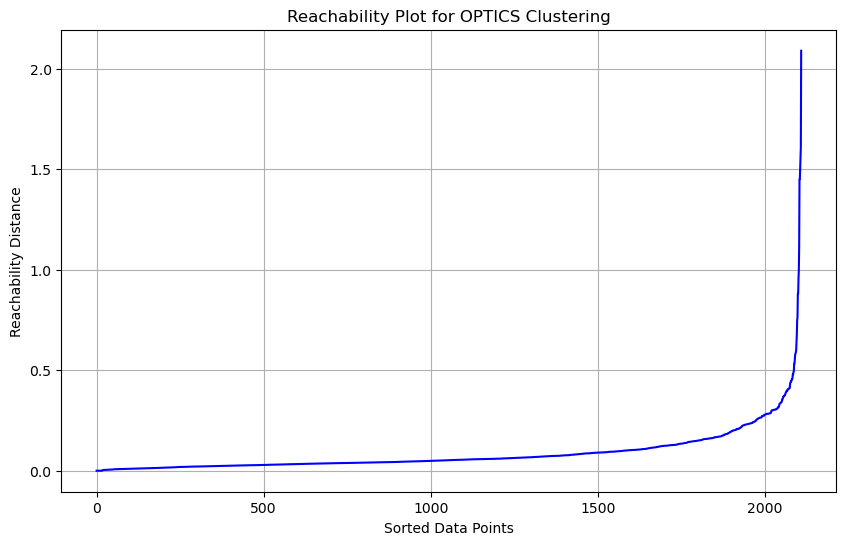

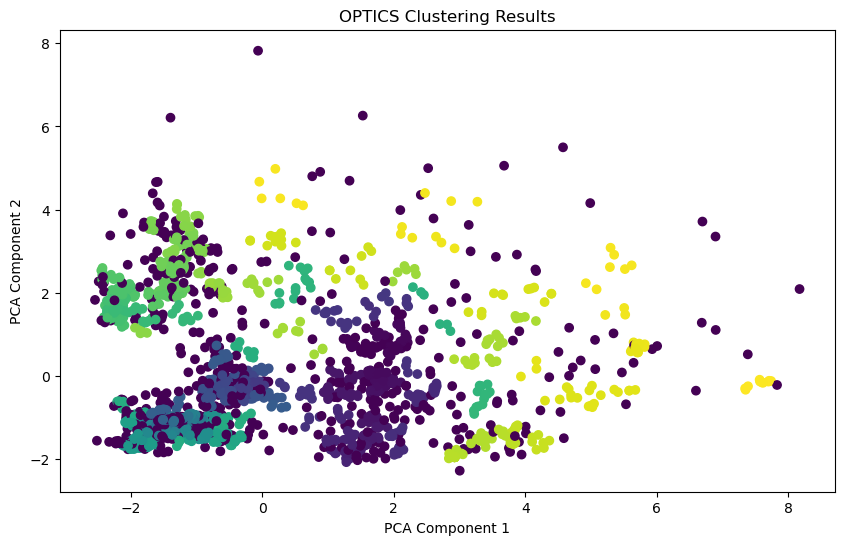

In [19]:
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_pca is already PCA-transformed data

# Initialize OPTICS model
optics_model = OPTICS(min_samples=3, xi=0.05, min_cluster_size=3)

# Fit the model to the data
optics_model.fit(df_pca)

# Reachability distances (used for the plot)
reachability = optics_model.reachability_

# Sort the reachability distances and plot
# The reachability distances are ordered by their core distances, so we can visualize them
plt.figure(figsize=(10, 6))
plt.plot(range(len(reachability)), np.sort(reachability), color='blue')
plt.title('Reachability Plot for OPTICS Clustering')
plt.xlabel('Sorted Data Points')
plt.ylabel('Reachability Distance')
plt.grid(True)
plt.show()

# Optionally, plot the clusters (if applicable)
labels = optics_model.labels_
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis')
plt.title('OPTICS Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()



In [20]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
sil_score = silhouette_score(df_pca, optics_model.labels_)

# Print the score
print(f"Silhouette Score: {sil_score:.4f}")


Silhouette Score: 0.0697


C:\Users\lenovo1\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


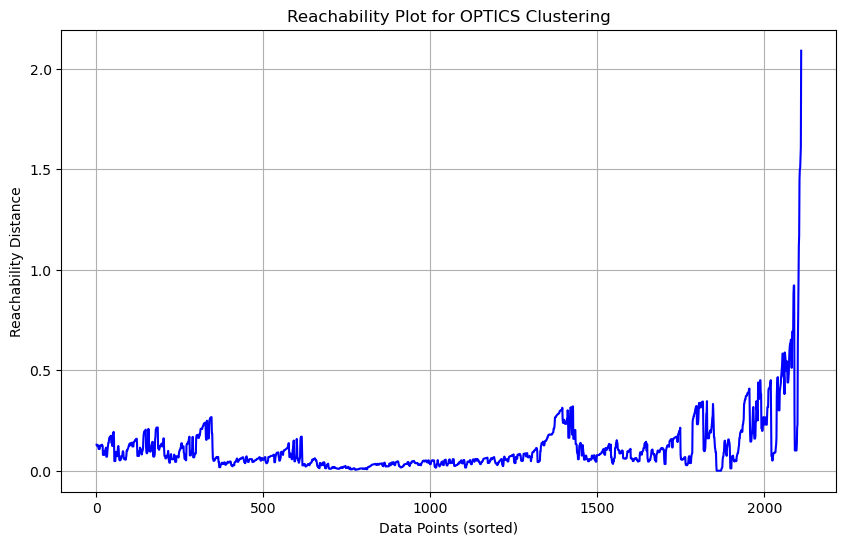

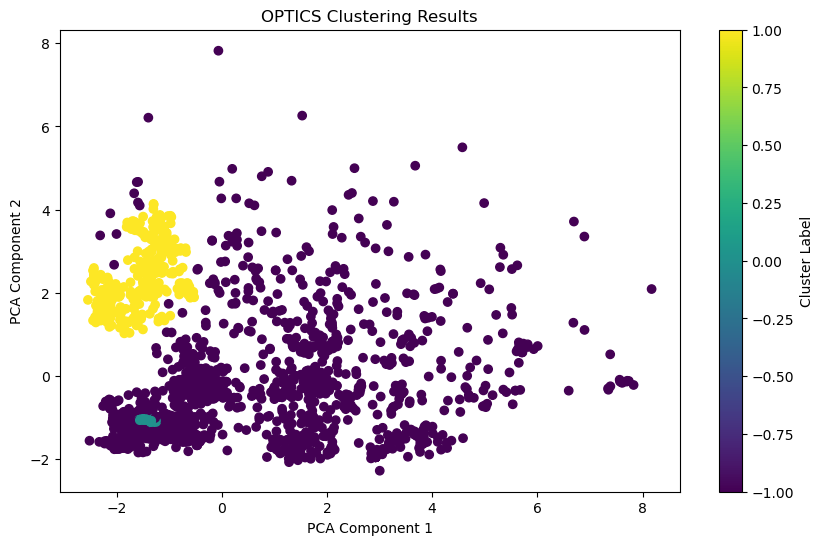

In [21]:
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_pca is the PCA-transformed data

# Parameter tuning
min_samples = 5
xi = 0.1
min_cluster_size = 0.05  # as a proportion of total points

# Initialize the OPTICS model with tuned parameters
optics_model = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=min_cluster_size)

# Fit the model
optics_model.fit(df_pca)

# Reachability distances for the reachability plot
reachability = optics_model.reachability_[optics_model.ordering_]

# Plot reachability distances
plt.figure(figsize=(10, 6))
plt.plot(reachability, color='blue')
plt.title('Reachability Plot for OPTICS Clustering')
plt.xlabel('Data Points (sorted)')
plt.ylabel('Reachability Distance')
plt.grid(True)
plt.show()

# Cluster labels from OPTICS
labels = optics_model.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('OPTICS Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


C:\Users\lenovo1\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


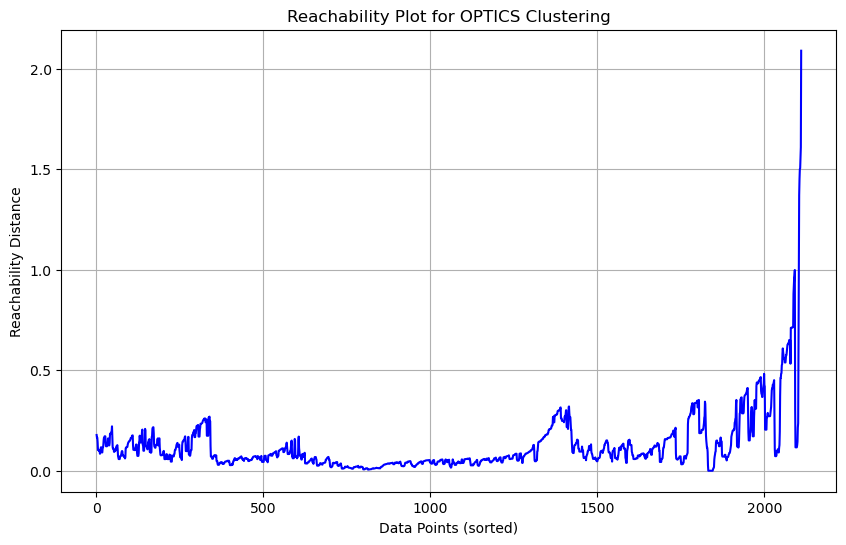

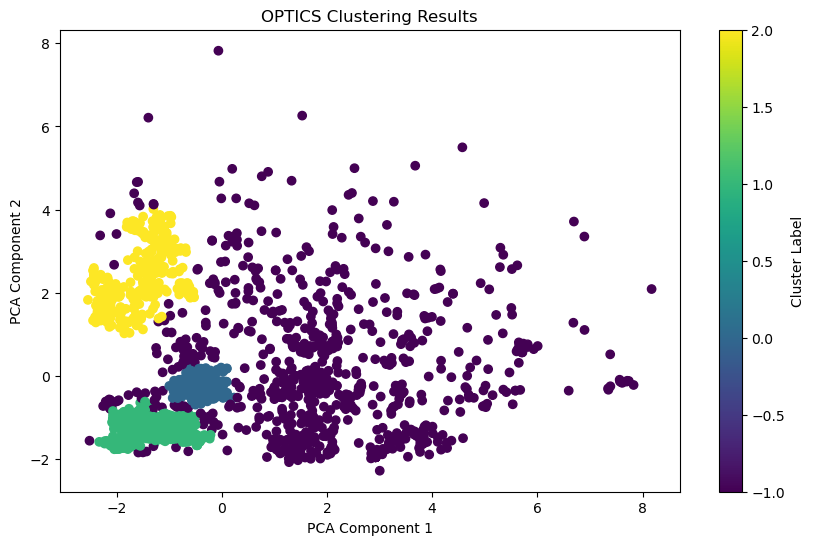

In [23]:
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_pca is the PCA-transformed data

# Parameter tuning with increased min_samples and adjusted xi
min_samples = 6  # Increased by one
xi = 0.08        # Adjusted for finer clusters
min_cluster_size = 0.05  # as a proportion of total points

# Initialize the OPTICS model with updated parameters
optics_model = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=min_cluster_size)

# Fit the model
optics_model.fit(df_pca)

# Reachability distances for the reachability plot
reachability = optics_model.reachability_[optics_model.ordering_]

# Plot reachability distances
plt.figure(figsize=(10, 6))
plt.plot(reachability, color='blue')
plt.title('Reachability Plot for OPTICS Clustering')
plt.xlabel('Data Points (sorted)')
plt.ylabel('Reachability Distance')
plt.grid(True)
plt.show()

# Cluster labels from OPTICS
labels = optics_model.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('OPTICS Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [24]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
sil_score = silhouette_score(df_pca, optics_model.labels_)

# Print the score
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.3314


C:\Users\lenovo1\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


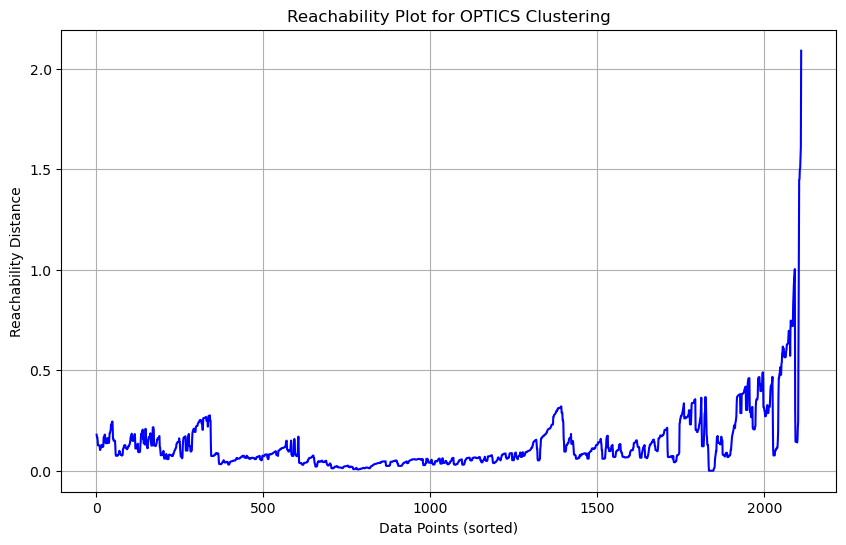

Silhouette Score: 0.3776


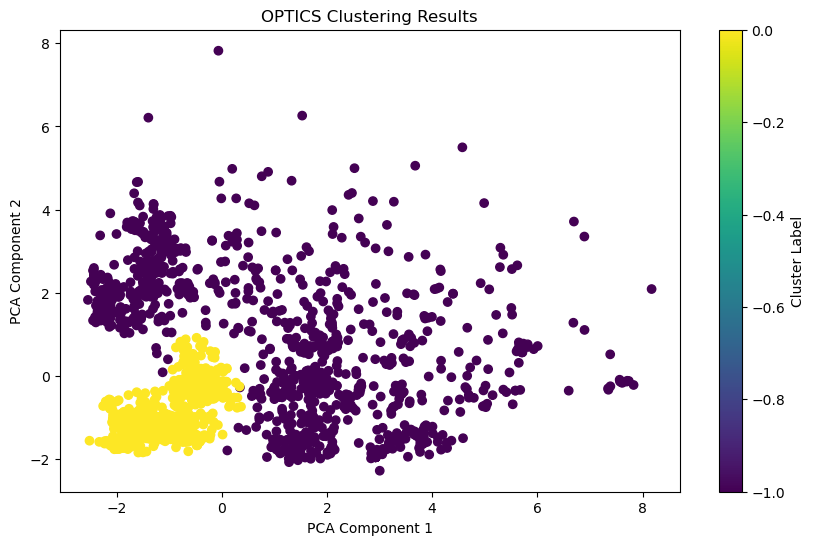

In [25]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_pca is the PCA-transformed data

# Updated parameter tuning
min_samples = 7  # Slightly higher for better-defined clusters
xi = 0.1         # Moderate adjustment for more stable clusters
min_cluster_size = 0.1  # Consider larger clusters

# Initialize and fit the OPTICS model
optics_model = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=min_cluster_size)
optics_model.fit(df_pca)

# Calculate reachability distances for the reachability plot
reachability = optics_model.reachability_[optics_model.ordering_]

# Plot reachability distances
plt.figure(figsize=(10, 6))
plt.plot(reachability, color='blue')
plt.title('Reachability Plot for OPTICS Clustering')
plt.xlabel('Data Points (sorted)')
plt.ylabel('Reachability Distance')
plt.grid(True)
plt.show()

# Get cluster labels and calculate the Silhouette Score
labels = optics_model.labels_
silhouette_avg = silhouette_score(df_pca, labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('OPTICS Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


Optics clustering performs well in above plot we can that because it capatures noise however dbscan captures well as data is categorical it tends less to perform good in data